### mp.solutions.hands使用
- 进行操作前，一定要先进行颜色空间转换到RGB，显示的时候要再转换回去。
- 注意results里面包含了哪些内容
- 注意results.multi_hand_landmarks  包含了手势的坐标点，以列表的形式存储了一只或者多只手。hand_landmarks = results.multi_hand_landmarks[0]取出第一只的点。
- 注意4中的hand_landmarks 并不是一个包含21组坐标的,而hand_landmarks.landmark包含了21个坐标的列表，通过.x 或者 .y的方式索引坐标

In [1]:
import cv2
import mediapipe as mp


mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mpDraw = mp.solutions.drawing_utils

image = cv2.imread('.\\image\\victory.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image)

h,w,c = image.shape
# if results.multi_hand_landmarks:
#     for hand_landmarks in results.multi_hand_landmarks:
#         print(type(results.multi_hand_landmarks))
#         #print(hand_landmarks)
#         #print(hand_landmarks.landmark)
#         mpDraw.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)



if results.multi_hand_landmarks:
    for hand_lm in results.multi_hand_landmarks:
        for lm in hand_lm.landmark:
            x = int(lm.x * w)
            y = int(lm.y * h)
            cv2.circle(image, (x,y),5,(255,0,12),-1)

image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

cv2.imshow('MediaPipe Hand Tracking', image)
cv2.waitKey(0)
cv2.destroyAllWindows()
 
hands.close()

### 练一练，摄像头操作

In [3]:
import cv2
import mediapipe as mp
 
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mpDraw = mp.solutions.drawing_utils
cap = cv2.VideoCapture(0)
 
while True:
    pass
    
 
hands.close()
cap.release()

KeyboardInterrupt: 

### 基于规则的手势识别
- results.multi_hand_landmarks是一个列表，含有两个左右手的landmark值。  
其中每一个元素可以使用landmark.landmark的方式去逐点访问
- 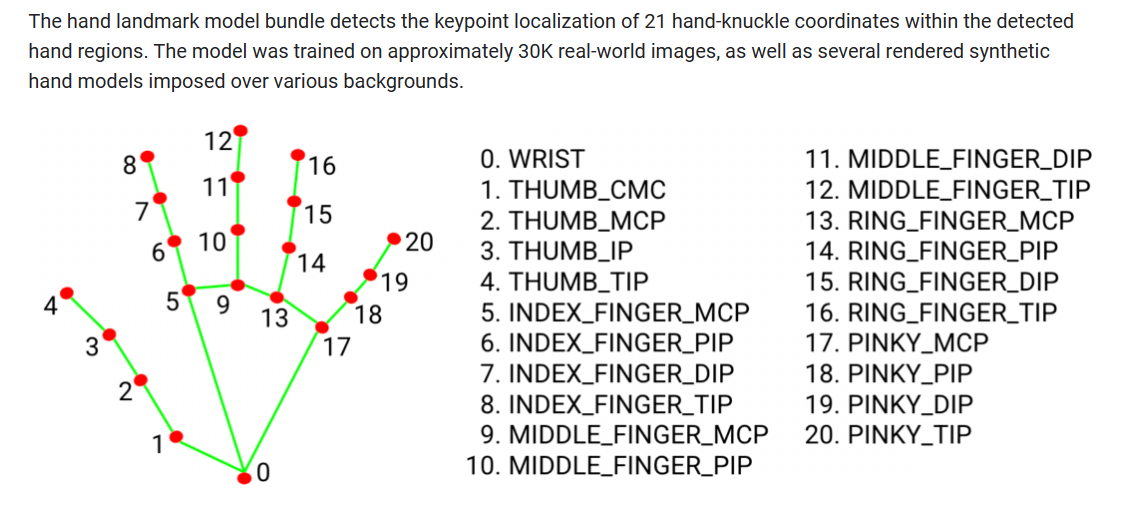
- mcp 掌指关节
- ip 指间关节
- pip 近端指间关节
- dip 远端指间关节
- cmc 腕掌关节

In [16]:
import cv2
import mediapipe as mp
import numpy as np

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False, max_num_hands=2, min_detection_confidence=0.5)
mpDraw = mp.solutions.drawing_utils
image = cv2.imread('./image/pointing_up.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
results = hands.process(image)
h,w,c = image.shape

lst_lms = []

#将所有手势坐标点，加到一个列表当中 [(x1,y1),(x2,y2),....]总计21个
if results.multi_hand_landmarks:
    for single_hand_marks in results.multi_hand_landmarks:
        for id,lm in enumerate(single_hand_marks.landmark):
            x, y = int(w * lm.x), int(h * lm.y) #原本的lm.x 和 lm.y都是小数，乘以w和h后，才会是真实坐标
            cv2.circle(image, (x,y),2,(255,1,0),-1)
            lst_lms.append([x,y])
        
lst_lms = np.array(lst_lms)#
hull_index = [0,1,2,3,6,10,14,18,17] #取出来目标的9个点，
hull = cv2.convexHull(lst_lms[hull_index, :])#将九个点连成一个一个闭环

cv2.polylines(image, [hull], True, (222,222,0), 2)#h画出来这个闭环


up_finger = []#这是闭环外的列表

for i in [4,8,12,16,20]:#轮训这五个指尖点，看看哪些指尖点是在上面的闭环外
    point = (int(lst_lms[i][0]), int(lst_lms[i][1]))
    dist = cv2.pointPolygonTest(hull, point, True)#计算点到轮廓的距离，小于0说明在轮廓里面。
    print(dist)
    if dist < 0:
        up_finger.append(i)
print(up_finger)

if len(up_finger) == 1 and up_finger[0] == 8:#如果在闭环外面的点只有一个，且这个手是8号点
    guesture = 'one'
else:
    guesture = 'None'

if guesture:
    cv2.putText(image, guesture, (30,30), cv2.FONT_HERSHEY_COMPLEX, 1, (222,21,122), 1)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.imshow('MediaPipe Hand Tracking', image)
cv2.waitKey(0) 
cv2.destroyAllWindows()
hands.close()

8.909545442950499
-31.25699921617557
14.990663761154808
10.723360933368038
4.670271550055666
[8]
